# **Stock Price Prediction**


*   In this project, we will be talking about predicting the returns on stocks. 
*   We will predict the stock price using the LSTM neural network.
*   The data contains records about the stock price of Tata Global Beverages Limited. The dataset also contains a date-wise price of stock with open, close, high, and low prices along with volume traded as well as turnover on that day.

### 1.    Imports

In [3]:
import os
from sqlalchemy import create_engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

### 2. Connection to mysql server

In [11]:
# Set environment variables
os.environ['MYSQL_DB_USERNAME'] = input("Enter the username of the environment variable:")
os.environ['MYSQL_DB_PASSWORD'] = input("Enter the password of the environment variable:")

# Get environment variables
user_name = os.environ.get('MYSQL_DB_USERNAME')
password = os.environ.get('MYSQL_DB_PASSWORD')

In [12]:
# DEFINE THE DATABASE CREDENTIALS
user = user_name
password = password
host = 'localhost'
port = 3306
database = 'schema_2_'
  
# PYTHON FUNCTION TO CONNECT TO THE MYSQL DATABASE AND
engine= create_engine(url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(user, password, host, port, database))
connection=engine.connect()

## 3.   Read the dataset:

In [13]:
query = """SELECT * FROM schema_2_.Stock_Price_Predicton;"""

df = pd.read_sql(query, con=connection)

In [15]:
df.head()

,Date,Open,High,Low,Last,Close,Total_Trade_Quantity,Turnover_Lacs
0,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


 ## 4. Analyze the closing prices from dataframe:

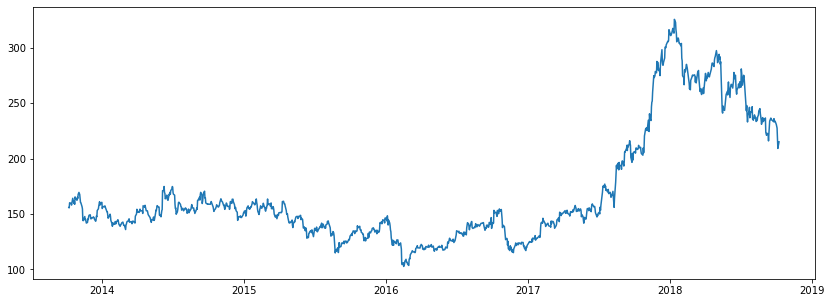

In [16]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(14,5))
plt.plot(df["Close"],label='Close Price history')

### 5. Sort the date time & filter “Date” and “Close” columns:

In [17]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]

new_dataset.head()

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45


### 6. Normalize the dataset:

In [18]:
# scaler=MinMaxScaler(feature_range=(0,1))
# final_dataset=new_dataset.values
# train_data=final_dataset[0:987,:]
# valid_data=final_dataset[987:,:]
# new_dataset.index=new_dataset.Date
# new_dataset.drop("Date",axis=1,inplace=True)
# scaler=MinMaxScaler(feature_range=(0,1))
# scaled_data=scaler.fit_transform(final_dataset)
# x_train_data,y_train_data=[],[]
# for i in range(60,len(train_data)):
#     x_train_data.append(scaled_data[i-60:i,0])
#     y_train_data.append(scaled_data[i,0])
    
# x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
# x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))